In [53]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

comments = pd.read_csv('video_comments.tsv', sep='\t')
stopwords = stopwords.words("portuguese")

In [54]:
import re

def wc(x): 
    try:
        return len(re.findall(r'\w+', x['comment']))
    except:
        return 0
    
comments['wc'] = comments.apply(wc,axis=1)
comments = comments[comments['wc'] > 1]


comments[['professor','wc']].groupby(['professor']).agg(['count','mean'])

wc           
          count       mean
professor                 
Expert 1     42  16.142857
Expert 2     48  12.416667
Expert 3     48  18.708333
Expert 4     48  22.833333
Expert 5     48  64.104167
Expert 6     48  12.270833

In [60]:
profList = collections.OrderedDict()
for prof in comments['professor'].unique():
    profList[prof] = comments[comments['professor'] == prof]['comment'].values
    
profTexts = []
for prof in profList:
    profTexts.append(" ".join(profList[prof]))
    
len(profTexts) 

6

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=100, strip_accents='unicode', stop_words=stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(profTexts)

tfidf = TfidfVectorizer().fit_transform(profTexts)
matrix = (tfidf_matrix * tfidf_matrix.T).A

matrix

array([[ 1.        ,  0.36708492,  0.31370451,  0.36120827,  0.43772348,
         0.20136557],
       [ 0.36708492,  1.        ,  0.22305922,  0.40441806,  0.50761112,
         0.23038783],
       [ 0.31370451,  0.22305922,  1.        ,  0.21604251,  0.43524291,
         0.10448119],
       [ 0.36120827,  0.40441806,  0.21604251,  1.        ,  0.47021379,
         0.11061875],
       [ 0.43772348,  0.50761112,  0.43524291,  0.47021379,  1.        ,
         0.11766937],
       [ 0.20136557,  0.23038783,  0.10448119,  0.11061875,  0.11766937,
         1.        ]])

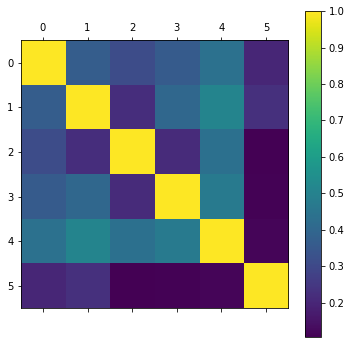

In [63]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(len(matrix), len(matrix)))
cax = ax.matshow(matrix)
fig.colorbar(cax)